**Содержание темы**

1. Теория

2. [Практика](https://colab.research.google.com/drive/1E1JPuxF0zO-CTNjmfJWDcMDqQqBW-seD?usp=sharing)


Привет!

Сегодня вы решите довольно интересную задачу. На предыдущих занятиях вы научились создавать и обучать нейронные сети. Но это были сырые модели, которые могли существовать в рамках ноутбука Google Сolaboratory.

Но как применить обученную нейронную сеть в реальных задачах? Для этого вам нужно: 
- изучить устройство модулей в языке **Python** и научиться создавать свои;
- создать нейросеть и сохранить ее параметры;
- упаковать нужные данные в самостоятельно написанный модуль;
- загрузить их на демо-панель.

Сейчас вы детально разберете эти шаги. 


[**Демо-панель**](https://srv2.demo.neural-university.ru/index.html) - разработка Университета, на которой выложено множество различных примеров работы нейронных сетей. У каждого участника есть возможность разместить на демо-панели собственную работу (например, свой дипломный проект). В рамках сегодняшнего занятия вы также сможете создать временную страничку со своей работающей нейронной сетью на демо-панели (это будет несложная задача классификации изображений).

Цель урока - ознакомление с технологией интеграции нейронных сетей в готовый продукт, будь то сайт или другое приложение. На данном этапе это даст возможность видеть результат своей работы не только в ноутбуке, но и в виде веб-продукта.

В конце урока вы сможете получить готовую страницу на демо-панели УИИ, которая будет доступна в течение двух дней.

Поскольку ваше погружение в удивительный мир нейронных сетей только началось, здесь не будет углублённого разбора конфигурирования сервера, настройки веб-сайта и средств разработки. Часть этих знаний вы получите позже из наших уроков, а если сказанное выше не испугало, но заинтересовало, то на платформе УИИ есть дополнительные курсы, отдельно посвященные этим тематикам.

# Модули


Модуль (**module**) – это файл, который содержит набор связанных между собой функций, классов, переменных. Формально это любой файл с исходным кодом, имеющий расширение **.py**. В отличие от программ, модули обычно создаются для импортирования в другие программы или модули. Они не предназначены для непосредственного запуска, хотя и здесь есть варианты. Но об этом позже.

Модули упрощают написание кода: помогают упорядочить информацию, избежать повторов и нагромождений, скрыть часть кода. А также дают возможность пользоваться кодом других разработчиков.


## Виды модулей

### Встроенные модули **Python**


Библиотека стандартных модулей в **Python** весьма обширна: к вашим услугам инструменты для работы с текстами, массивами данных, таблицами, изображениями и так далее.

Некоторые из них вы уже встречали: **math, numpy, pandas, random, sys, os, keras** ...


Для примера рассмотрим модуль **math**.

Прежде чем использовать функции модуля, импортируйте его в ноутбук:

In [1]:
import math

Эта инструкция создает объект модуля **math**. Если вы вызовете объект модуля в ячейке, то получите некоторую информацию о нем, например, что это встроенный модуль. 

После установки интерпретатора **Python** встроенные модули сразу доступны для импорта.

In [2]:
math

<module 'math' (built-in)>

In [3]:
# Вызов пространства имен объекта модуля

print(dir(math)) 

['__doc__', '__loader__', '__name__', '__package__', '__spec__', 'acos', 'acosh', 'asin', 'asinh', 'atan', 'atan2', 'atanh', 'ceil', 'copysign', 'cos', 'cosh', 'degrees', 'e', 'erf', 'erfc', 'exp', 'expm1', 'fabs', 'factorial', 'floor', 'fmod', 'frexp', 'fsum', 'gamma', 'gcd', 'hypot', 'inf', 'isclose', 'isfinite', 'isinf', 'isnan', 'ldexp', 'lgamma', 'log', 'log10', 'log1p', 'log2', 'modf', 'nan', 'pi', 'pow', 'radians', 'remainder', 'sin', 'sinh', 'sqrt', 'tan', 'tanh', 'tau', 'trunc']


Объект модуля содержит функции, классы, переменные и константы, определенные в модуле. Чтобы получить доступ к одной из переменных, укажите имя модуля и допишите имя переменной через точку. Такой формат называется точечной нотацией:


In [4]:
# Обращение к переменной модуля и запись ее в переменную

d = math.pi
print(d)

3.141592653589793


In [5]:
# Вызов функции, вычисляющей факториал числа 5 (5!) 

math.factorial(5)                      

120

In [6]:
# Подключение конкретной функции, чтобы обращаться к ней напрямую

from math import exp

print(exp(10))

22026.465794806718


Еще один пример – модуль **os**. Он предоставляет множество инструментов для работы с файлами (открыть, записать, прочитать, закрыть и т.д.):

In [7]:
import os 

In [8]:
# Вывод на экран результата выполнения функии listdir() из библиотеки os

print(os.listdir(), 'Type: ', type(os.listdir()))  

['.config', 'sample_data'] Type:  <class 'list'>


In [9]:
# Просмотр файлов в каталоге /content/sample_data

print(os.listdir('/content/sample_data'))          

['README.md', 'anscombe.json', 'mnist_train_small.csv', 'california_housing_test.csv', 'mnist_test.csv', 'california_housing_train.csv']


### Самостоятельно написанные модули


Кроме всего прочего, самостоятельно разработанные модули позволяют собрать в одном месте все функции, а затем удобно ими пользоваться в нескольких проектах. Шаги, которые вам предстоит выполнить для создания своего собственного модуля:
1. Написание кода, который будет помещен в модуль **имя_файла.py**:


In [10]:
# Код, который будет сохранен в файл

''' 
  1) Вывод на экран Hello, World
  2) Объявление функции 
  3) Вывод на экран Completed
  
'''

' \n  1) Вывод на экран Hello, World\n  2) Объявление функции \n  3) Вывод на экран Completed\n  \n'

2. Проверка и доработка кода, который будет помещен в модуль **имя_файла.py**;
3. Сохранение кода модуля в файле с помощью переменной **text**:

In [11]:
# Присваивание переменной значения - большой строки с отлаженным кодом

text = '''
print('Hello, world!')

def func(arg=5):
    print('Вызвана функция!')
    return {k: k ** 2 for k in range(1, arg)}

print('Completed!')

'''

Обычно для записи значений строк используются два вида кавычек, например `'текст'` или `"текст"`.

В данном примере использован строковый литерал для многострочного комментария `'''текст'''`. Тройные кавычки позволяют сохранять в переменной текст со всеми переносами строк. В то же время с ним можно работать и как с обычным текстом в **Python**.

Так как в переменной **text** содержится строка, вам доступны строковые методы, такие как `.upper()`, `.lower()`, `.split()` и пр. В данном случае используйте метод `.strip()`. Он удалит ненужные символы перевода строки в начале и конце текста:

In [12]:
# Открытие файла или создание, если такового нет

with open('test1.py',    # название открываемого/создаваемого файла
          'w'            # режим работы с файлом, "w" - write (перезапись), "r" - read (чтение)
          ) as f:  
  
    f.write(text.strip())  # запись переменной в файл            

**Важно!** Перезапись влечет за собой удаление содержимого файла, если файл уже существовал на момент вызова. Чтение никак не изменяет файл, просто дает доступ к его содержимому.

После выполнения кода должен появиться файл **test1.py** в дереве файлов в левой части ноутбука:


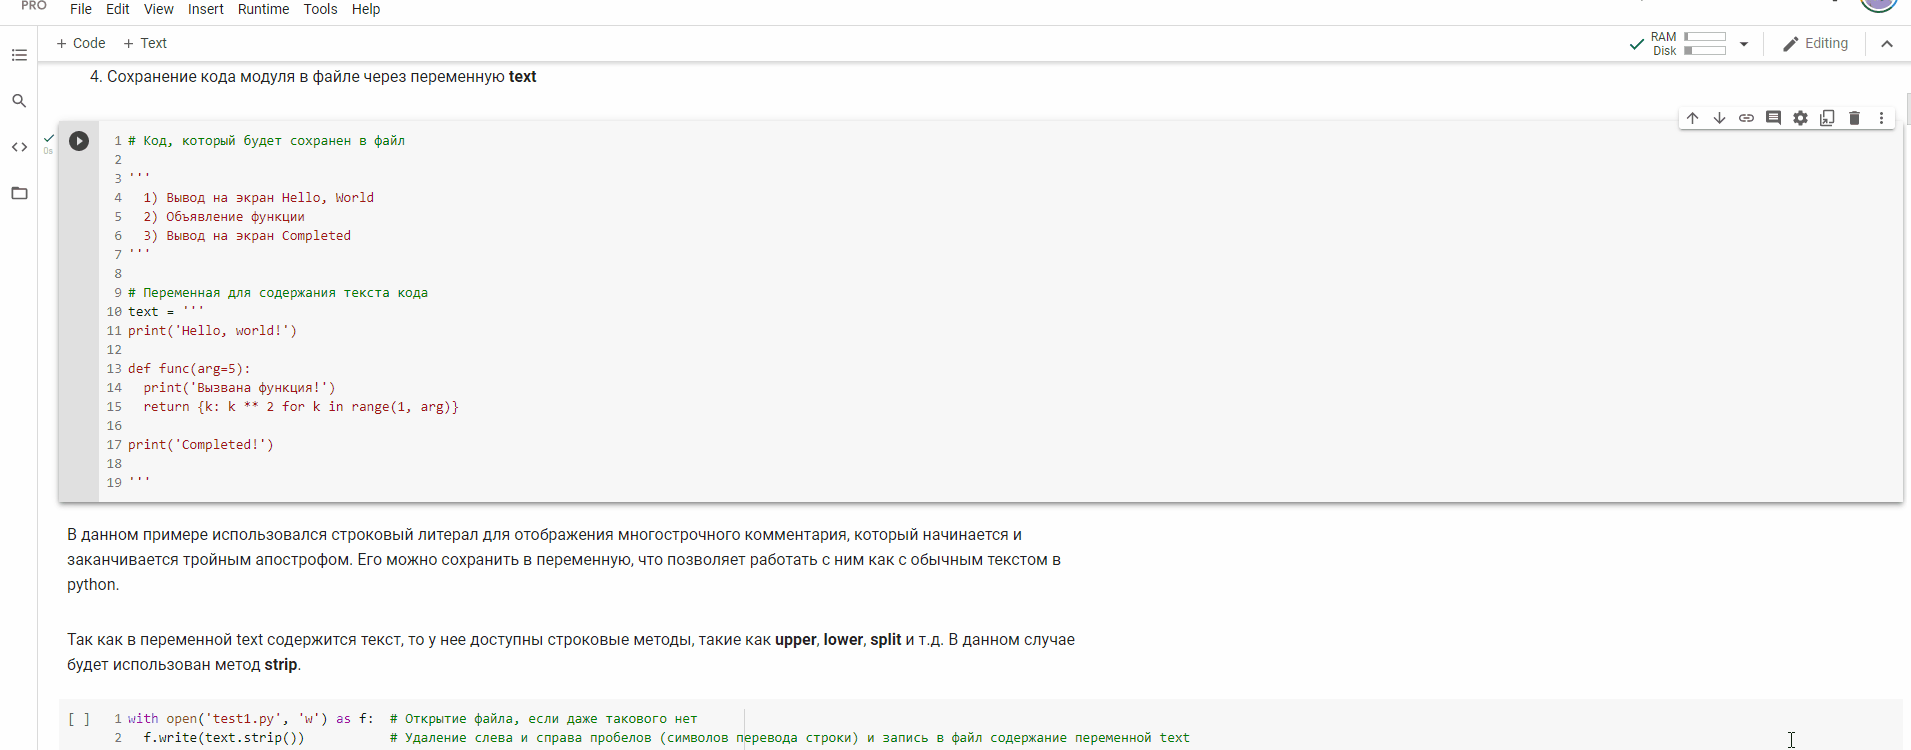

Ключевое слово **with** перед вызовом функции `open()` запускает ***контекстный менеджер***, который по завершении кода внутри **with** автоматически закроет файл. Можно записать все необходимые действия и явно:



In [13]:
f = open('test1.py', 'w') 
f.write(text.strip()) 
f.close()


**Важно!** Закрывать файл после работы - хорошая практика программирования. Она избавляет от многих ошибок и проблем с памятью. 

## Запуск модуля с помощью интерпретатора **Python**

На данный момент вы создали файл и поместили в него текст из переменной (код на языке **Python**). Протестируйте созданный модуль, запустив его из командной строки с помощью интерпретатора **Python**:


In [14]:
# Запуск модуля из командной строки (начинается с !)

!python test1.py                  

Hello, world!
Completed!


Интерпретатор выполнил весь код, записанный в вашем программном файле (модуле) - поэтому вы и увидели такие строки. По сути это аналогично запуску ячейки Colab с кодом из модуля:


In [15]:
print('Hello, world!')

def func(arg=5):
    print('Вызвана функция!')
    return {k: k ** 2 for k in range(1, arg)}

print('Completed!')

Hello, world!
Completed!


Пока функция `func()` никак себя не проявила, потому что к ней не было обращения, и она не запрограммирована на автоматический запуск при старте модуля. Чтобы ею воспользоваться, импортируйте весь модуль целиком в ноутбук с помощью инструкции **import**:


In [16]:
import test1                      

Hello, world!
Completed!


Теперь вам доступны все переменные и функции, которые есть в модуле **test1**:

In [17]:
# Вызов функции func из импортированного модуля test1

test1.func(7)  # аргумент можно задать свой, а можно пропустить, оставляя значение по умолчанию     

Вызвана функция!


{1: 1, 2: 4, 3: 9, 4: 16, 5: 25, 6: 36}

Вы уже знаете, что, в отличие от программ, модули не предназначены для непосредственного запуска, и обычно их создают для подключения к другим программам.

Посмотрим, как это можно изменить.

Определим условие вывода строки `print('Completed!')` через условную конструкцию

```
if __name__ == '__main__':
```

что буквально означает следующее: если значение служебной переменной `__name__` равно `'__main__'`, то нужно выполнить код из блока условного оператора.

Вы проверяете именно это условие, потому что только при запуске с помощью интерпретатора `!python` имя вашего модуля (значение служебной переменной `__name__`) становится `'__main__'`. 

Иначе говоря, конструкцию `if __name__ == '__main__':` используют, чтобы определённый код выполнялся только в момент запуска модуля при помощи `!python`. Это может быть информация об установке модуля, его версия и прочее, что может быть необходимо только при установке, а в остальное время данная информация не нужна.  

Проверьте, как это работает:


In [18]:
# Занесение кода в виде строки в переменную text

text = '''

print('Hello, world!')

def func(arg=5):
    print('Вызвана функция!')
    return {k: k ** 2 for k in range(1, arg)}

print(__name__)

if __name__ == '__main__':
    print('Completed!') 

'''

Прежде чем запустить свой модуль, создайте отдельную папку в директории colab, в которой он будет храниться. Для этого вам потребуется библиотека **os**, которая подробно описана чуть ниже.

Создайте папку **Test** и добавьте в нее модуль **test2.py** с новым вариантом кода:

In [19]:
# Импорт библиотеки
import os   

# Создание папки с помощью функции mkdir() модуля os
os.mkdir('Test')  # принимает путь в качестве аргумента

In [20]:
with open('Test/test2.py', 
          'w'
          ) as f:  

    f.write(text.strip())                

Проверьте дерево файлов в левой части ноутбука: оно должно содержать папку **Test** и файлы **test1.py** и **test2.py** по следующему образцу:

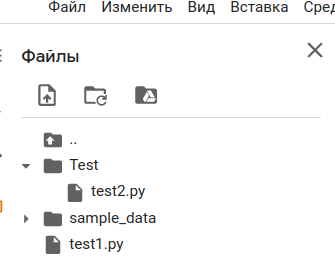

Запустите ваш модуль с помощью `!python`, указав путь к файлу модуля, включая и название содержащей его папки:

In [21]:
!python Test/test2.py

Hello, world!
__main__
Completed!


## Подключение модуля к ноутбуку colab

Попробуйте подключить модуль в ячейку Colab с помощью оператора **import**:

In [22]:
# Вызовет ошибку, так как файла модуля нет в текущей папке

import test2                         

ModuleNotFoundError: ignored

Данная ошибка говорит о том, что не **Python** не смог найти модуль **test2**. И это логично, потому что в рабочей папке действительно нет такого файла. 

Для подключения модуля придется указать полный путь к модулю в точечной нотации:

In [23]:
import Test.test2

Hello, world!
Test.test2


После подключения модуля появилась возможность обращаться к его функциям, переменным и классам через точку: 

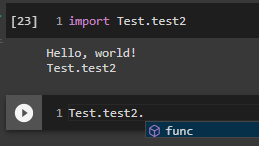

Также имеется возможность импортировать только отдельные функции из модуля:

In [24]:
from Test.test2 import func

func(10)

Вызвана функция!


{1: 1, 2: 4, 3: 9, 4: 16, 5: 25, 6: 36, 7: 49, 8: 64, 9: 81}

Передача параметров в функции модуля ничем не отличается от их передачи в обычные функции.

Посмотрим на определении функции в коде модуля:

```
func(arg=5)
```

где **func** - имя функции, а **arg=5** - параметр функции, по умолчанию имеющий значение **5**. Значение по умолчанию присваивается параметру, если этот параметр не передан при вызове функции. На примере это выглядит так:

In [25]:
print('в вызове функции не заданы параметры')
print(func())
print('')

print('в вызове функции задано значение первого параметра: 5')
print(func(5))
print('')

print('в функцию в качестве первого параметра передано значение переменной ten (10)')
ten=10
print(func(ten))

в вызове функции не заданы параметры
Вызвана функция!
{1: 1, 2: 4, 3: 9, 4: 16}

в вызове функции задано значение первого параметра: 5
Вызвана функция!
{1: 1, 2: 4, 3: 9, 4: 16}

в функцию в качестве первого параметра передано значение переменной ten (10)
Вызвана функция!
{1: 1, 2: 4, 3: 9, 4: 16, 5: 25, 6: 36, 7: 49, 8: 64, 9: 81}


## Подведем итоги

Вы изучили модули, узнали, как разрабатывать и подключать свои собственные. Следующим шагом вы создадите нейросеть и обучите ее, чтобы получить код для наполнения вашего будущего модуля.

**Содержание темы**

1. Теория

2. [Практика](https://colab.research.google.com/drive/1E1JPuxF0zO-CTNjmfJWDcMDqQqBW-seD?usp=sharing)
